# CARS BRANDS IN EGYPT


### We will provide pictures of cars used in Egypt

## <a href='https://www.kaggle.com/datasets/mohamedaziz15/cars-brands-in-egypt/data' target=_blank>You can find the data file here</a>

In [1]:
import cv2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir('archive/') 

['volkswagen',
 'Mitsubishi',
 'Renault',
 'Ford',
 '.DS_Store',
 'Byd',
 'kia',
 'Chevrolet',
 'Toyota',
 'nissan',
 'lada',
 'Skoda',
 'BMW',
 'Hundai',
 'Mercedes-Benz',
 'Honda',
 'Suzuki']

In [3]:
labels = ['volkswagen',
 'Mitsubishi',
 'Renault',
 'Ford',
 'Byd',
 'kia',
 'Chevrolet',
 'Toyota',
 'nissan',
 'lada',
 'Skoda',
 'BMW',
 'Hundai',
 'Mercedes-Benz',
 'Honda',
 'Suzuki']
img_path = 'archive/'

In [4]:
import os

dir_path = 'train/'

# Delete the .DS_Store file in the train/ directory
ds_store_path = os.path.join(dir_path, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [5]:
import os

img_list = []
label_list = []

valid_extensions = ['.jpg','.png','jpeg']

for label in labels:
    for img_file in os.listdir(img_path + label):
        ext = os.path.splitext(img_file)[1]
        if ext.lower() in valid_extensions:
            img_list.append(img_path + label + '/' + img_file)
            label_list.append(label)

In [6]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [7]:
df.shape

(8287, 2)

In [8]:
df.sample(10)

,img,label
417,archive/Mitsubishi/imagegeg_438.jpg,Mitsubishi
147,archive/Mitsubishi/imagegeg_657.jpg,Mitsubishi
8206,archive/Suzuki/18759.jpg,Suzuki
8189,archive/Suzuki/86.jpg,Suzuki
2796,archive/Toyota/448.jpg,Toyota
8246,archive/Suzuki/4385.jpg,Suzuki
7820,archive/Suzuki/10012.jpg,Suzuki
4409,archive/BMW/image659.jpg,BMW
1920,archive/Ford/7c5a7896-cdd7-4cc5-8371-8d6ce06f6...,Ford
2624,archive/Toyota/316.jpg,Toyota


In [9]:
d={'volkswagen':0,
 'Mitsubishi':1,
 'Renault':2,
 'Ford':3,
 'Byd':4,
 'kia':5,
 'Chevrolet':6,
 'Toyota':7,
 'nissan':8,
 'lada':9,
 'Skoda':10,
 'BMW':11,
 'Hundai':12,
 'Mercedes-Benz':13,
 'Honda':14,
 'Suzuki':15}

In [10]:
df['encode_label']=df['label'].map(d)

In [11]:
df.sample(5)

,img,label,encode_label
7015,archive/Suzuki/18970.jpg,Suzuki,15
5255,archive/Hundai/images76(1).jpg,Hundai,12
1191,archive/Renault/D8B1D98AD986D988-D8AFD8A7D8B3D...,Renault,2
3035,archive/Toyota/8119.jpg,Toyota,7
2596,archive/Toyota/13930.jpg,Toyota,7


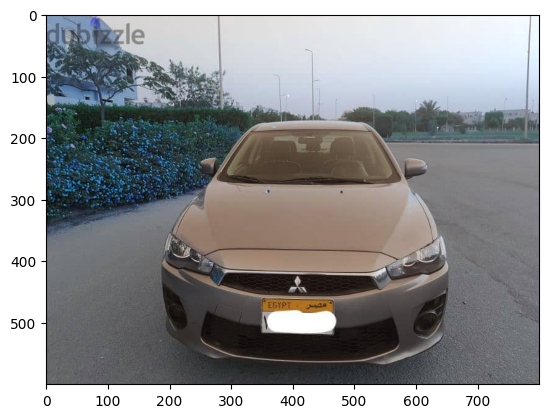

In [12]:
image=cv2.imread(str(df['img'][55]))
plt.imshow(image);

In [13]:
df.shape

(8287, 3)

In [14]:
import cv2
import pandas as pd
import os

x = []
processed_paths = []

for img_path in df["img"]:
    try:
        img = cv2.imread(str(img_path))
        if img is None:
            raise FileNotFoundError(f"{img_path} file didn't read.")

        img = cv2.resize(img, (28,28))
        img = img / 255.0
        x.append(img)
        processed_paths.append(img_path)
    except Exception as e:
        print(f"Error: {e}")

        if os.path.exists(img_path):
            os.remove(img_path)
        else:
            print(f"Attention: {img_path} file has already been deleted or cannot be found.")

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: sRGB: out of place
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [15]:
x=np.array(x)

In [16]:
x

array([[[[0.58039216, 0.61568627, 0.65490196],
         [0.23529412, 0.21960784, 0.20392157],
         [0.2745098 , 0.29411765, 0.27843137],
         ...,
         [0.6745098 , 0.53333333, 0.09411765],
         [0.68627451, 0.5254902 , 0.06666667],
         [0.70196078, 0.5372549 , 0.07058824]],

        [[0.2627451 , 0.30980392, 0.3254902 ],
         [0.23529412, 0.27058824, 0.28627451],
         [0.01176471, 0.01960784, 0.02352941],
         ...,
         [0.29411765, 0.30196078, 0.27843137],
         [0.48627451, 0.37254902, 0.13333333],
         [0.47058824, 0.37254902, 0.14117647]],

        [[0.1372549 , 0.14509804, 0.14509804],
         [0.21176471, 0.2627451 , 0.28627451],
         [0.1254902 , 0.14509804, 0.14117647],
         ...,
         [0.43137255, 0.41960784, 0.42745098],
         [0.17254902, 0.20392157, 0.19607843],
         [0.46666667, 0.49019608, 0.47058824]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [17]:
y=df['encode_label']

In [18]:
y.value_counts()

encode_label
15    1447
7     1232
11     992
14     898
3      825
12     801
2      691
1      608
13     597
6       47
5       46
10      43
9       21
4       16
8       14
0        9
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [22]:
model = Sequential()
model.add(Input(shape=(28,28, 3)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model. add (BatchNormalization ())
model.add(Conv2D(84, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50,verbose=1)

Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2179 - loss: 2.2835 - val_accuracy: 0.1188 - val_loss: 2.4294
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2828 - loss: 1.8442 - val_accuracy: 0.2479 - val_loss: 2.0949
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2993 - loss: 1.7632 - val_accuracy: 0.2925 - val_loss: 1.9002
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.2962 - loss: 1.7930 - val_accuracy: 0.3305 - val_loss: 1.7121
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.3168 - loss: 1.7306 - val_accuracy: 0.3251 - val_loss: 1.7258
Epoch 6/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3451 - loss: 1.6701 - val_accuracy: 0.3329 - val_loss: 1.8086
Epoch 7/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3501 - loss: 1.6249 - val_accuracy: 0.3559 - val_loss: 1.6882
Epoch 8/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3853 - loss: 1.5880 - val_accu

In [24]:
loss,accuracy=model.evaluate(x_test,y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5003 - loss: 2.0265


In [25]:
accuracy

0.4975874423980713

In [26]:
tahmin=model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [27]:
model.save('model.h5')

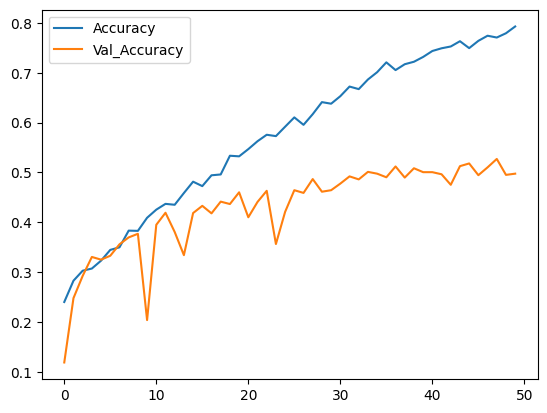

In [28]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [30]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[ 50,  22,  11,   0,   0,   0,   1,   0,   0,   0,  22,   7,   1,
         16,   2],
       [ 11,  41,  29,   0,   0,   0,   3,   0,   0,   0,  15,  11,  17,
         10,   1],
       [  3,  30,  63,   0,   0,   0,   4,   0,   0,   0,  21,  17,  20,
          7,   1],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,
          0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   1,
          0,   0],
       [  2,   3,   1,   0,   0,   0,   1,   0,   0,   0,   3,   0,   0,
          1,   0],
       [  2,   0,   0,   0,   0,   0, 192,   0,   0,   0,   4,   0,   0,
          4,  30],
       [  0,   0,   3,   0,   0,   0,   1,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0],
       [  2,   3,   3,   0,   0,   0,   0,   0,   0,   0,   1,   0,   1,
          1,   0],
       [ 13,  24,  17,   0,   0,   0,   2,   0,   0,   0, 104,  10,   8,
       

In [31]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

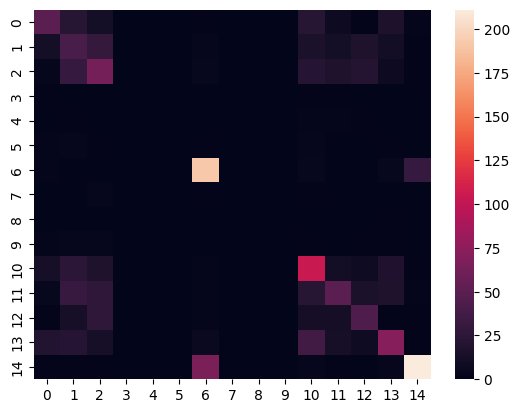

In [32]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [33]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           1       0.46      0.38      0.41       132
           2       0.22      0.30      0.25       138
           3       0.33      0.38      0.35       166
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        11
           7       0.69      0.83      0.75       232
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        11
          11       0.42      0.53      0.47       197
          12       0.40      0.30      0.34       169
          13       0.38      0.39      0.38       111
          14       0.47      0.38      0.42       189
          15       0.84      0.74      0.79       287

    accuracy                           0.50      1658
   macro avg       0.28      0.28      0.28      1658
weighted avg       0.50   

/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/salihbekdemir/Desktop/dersler/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

# Unfortunately, I could not pass Accuracy 0.50 in this lesson